Implement linear regression to predict the sale price of a house.
Explore the relationship between house features and prices.
Evaluate the model’s performance using Mean Squared Error (MSE) or R².

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
categoricals = df.select_dtypes(include=['object']).columns.to_list()

In [11]:
df = pd.get_dummies(df, columns=categoricals, drop_first=True)

In [12]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Price')

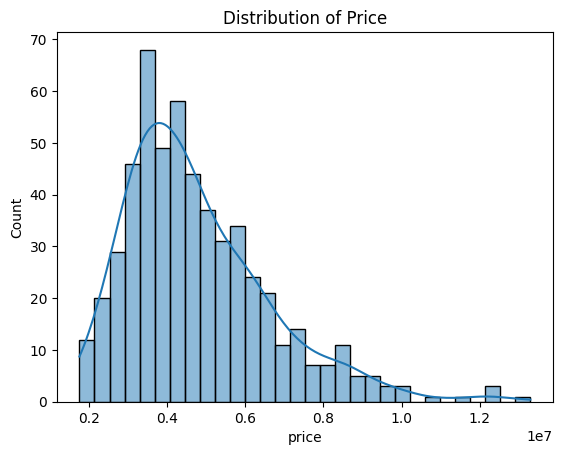

In [14]:
sns.histplot(df, x = 'price', bins = 30, kde = True)
plt.title('Distribution of Price')

<Axes: >

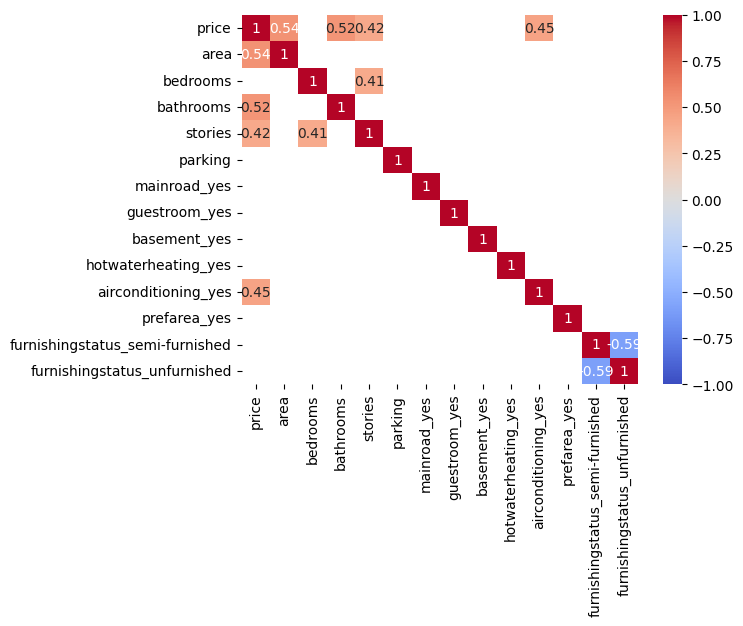

In [37]:
corr = df.corr()
threshold = 0.4
filtered_corr = corr.copy()
filtered_corr[np.abs(filtered_corr) < threshold] = np.nan
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=filtered_corr.isna())

In [95]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [98]:
print(LR.coef_)

[ 2.53287252e+02  8.08931413e+04  1.11475118e+06  4.17267580e+05
  3.03111236e+05  4.08073682e+05  2.75710533e+05  4.82603522e+05
  6.16375423e+05  6.85839346e+05  5.09192089e+05 -1.21652663e+05
 -3.91191241e+05]


In [99]:
print(LR.intercept_)

95784.2291119704


In [100]:
Pred = LR.predict(X_test)

In [101]:
mse = mean_absolute_error(y_test, Pred)
mse

920392.9397607957

In [102]:
rmse = np.sqrt(mse)
rmse

959.3711168055852

In [103]:
r2 = r2_score(y_test, Pred)
r2

0.6463350878895877

<Axes: xlabel='price', ylabel='Count'>

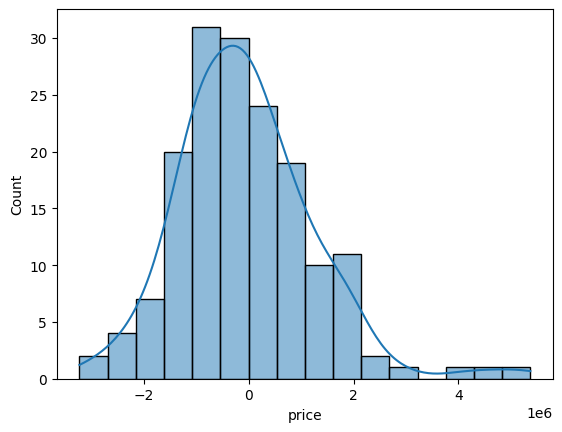

In [77]:
residuals = y_test - Pred
sns.histplot(residuals, kde=True)

Text(0.5, 1.0, 'Actual vs Predicted')

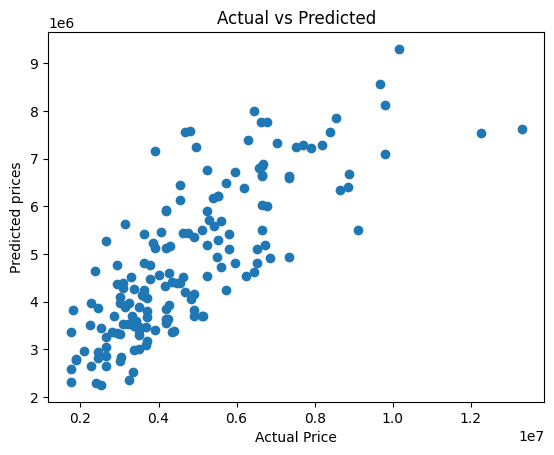

In [67]:
plt.scatter(y_test, Pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted')
